In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
credit = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Credit.csv')

Today we'll look at a dataset that looks at financial and demographic data for 400 people. Specifically we can use this data to predict the credit limit, rating, or account balance for a specific person.

In [3]:
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
credit.shape

(400, 12)

Say we want to predict a given person's credit rating given several other factors. We can first look at a pairplot to see the relationships between all variables.

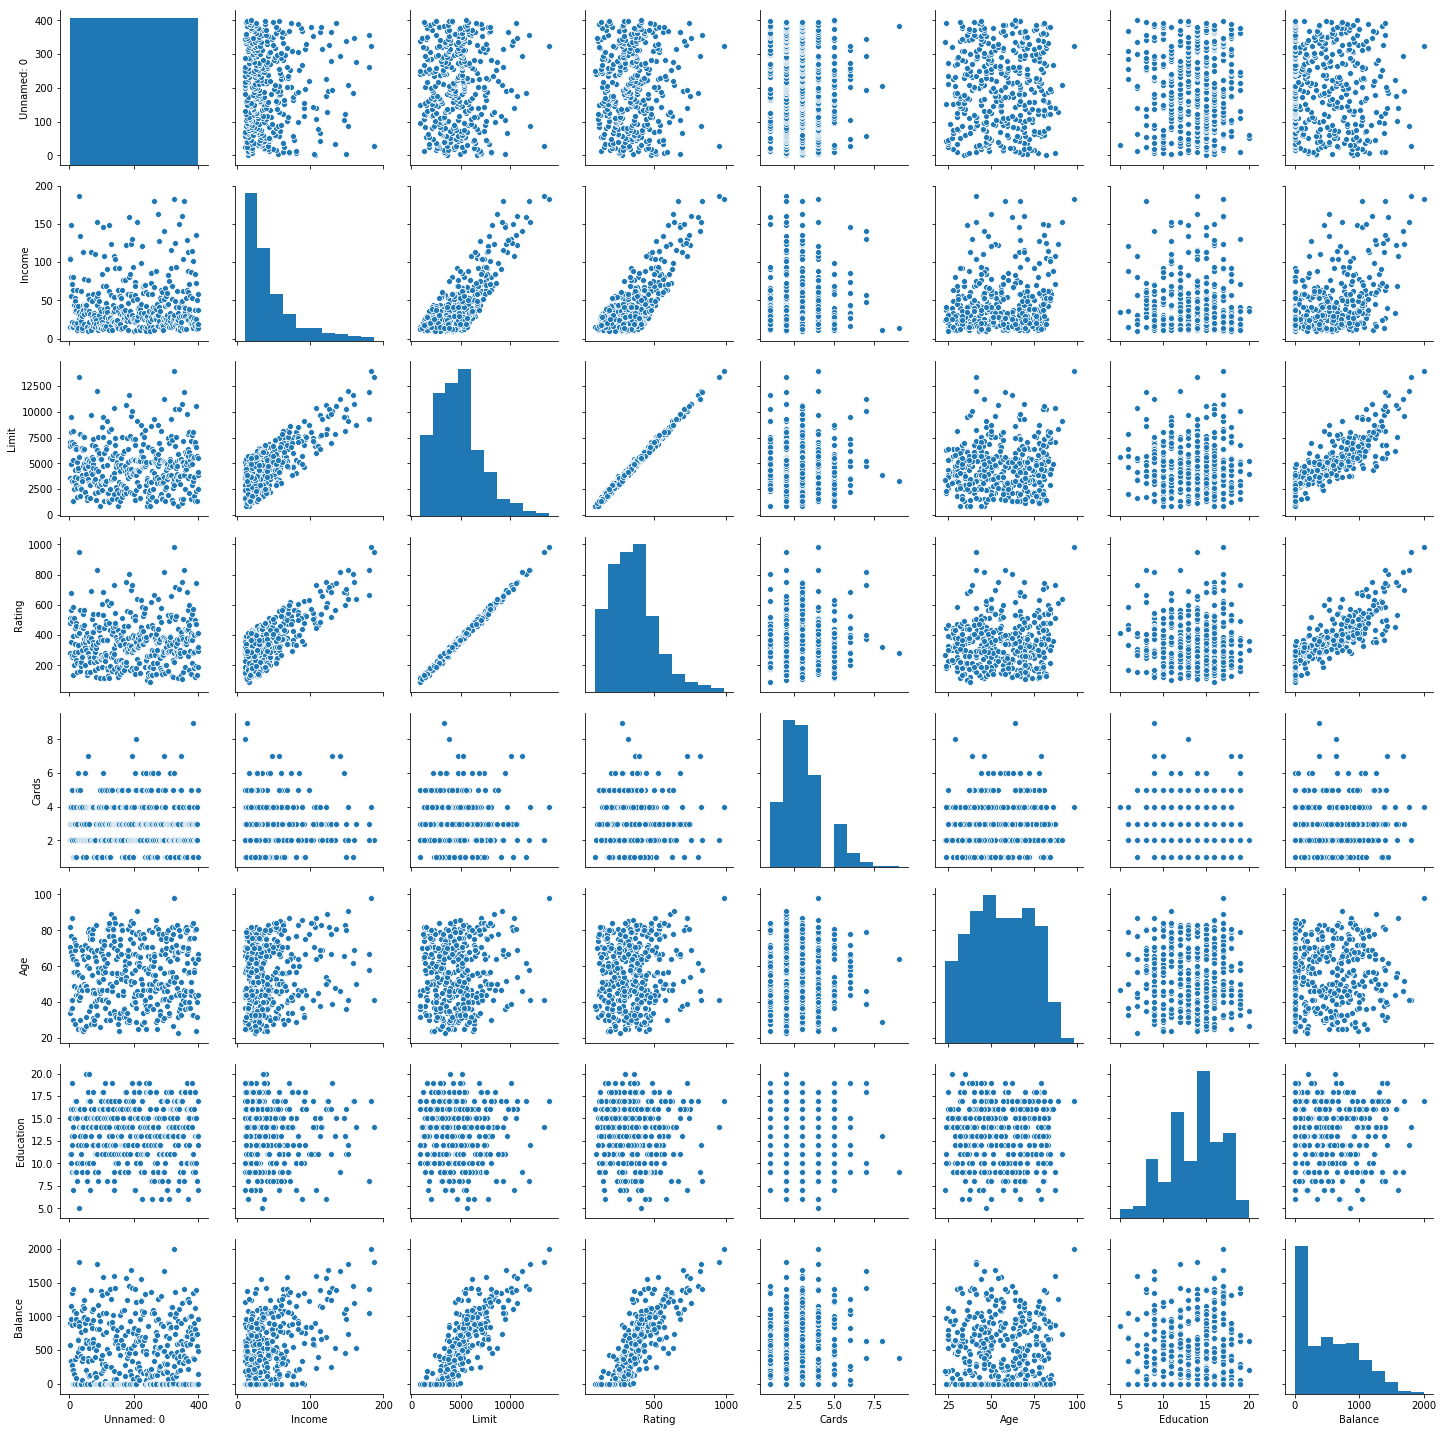

In [5]:
sns.pairplot(credit)

We can look at the vertical or horizontal column with 'Rating' to see how other columns correlate with it.

It appears that limit, income, and balance all have a strong correlation with it, while age looks like it has no correlation with rating. Education and cards also look random, but these are harder to tell because these two variables are only integer values. 

Note that the categorical variables - Gender, Student, Married, and Ethnicity are not in here.

If we want to look at Rating's relationship with a specific variable, we can use the tools we learned last class.

First we can look at histogram of the response variable, the credit rating.

Text(0.5,0.92,'Histogram of Credit Rating')

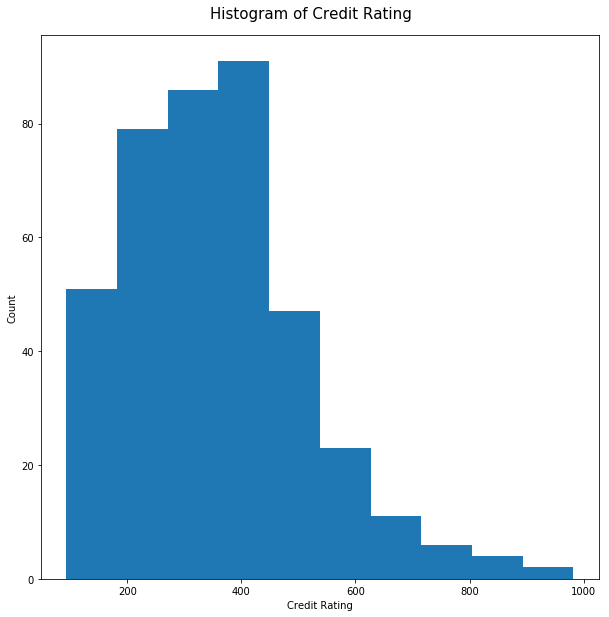

In [6]:
fig = plt.figure(figsize=(10,10))
plt.hist(credit['Rating'])
plt.xlabel('Credit Rating')
plt.ylabel('Count')
fig.suptitle('Histogram of Credit Rating', fontsize=15, y=0.92)

Note that the histogram is right skewed, which could lead to issues with a heteroskedastic residuals plot down the line. We'll keep this in mind as we continue our analysis.

Text(0.5,0.92,'Income vs. Credit Rating')

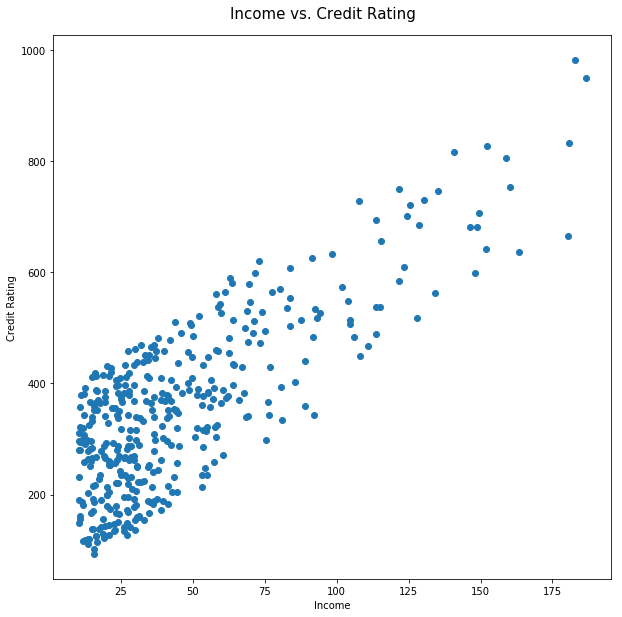

In [7]:
fig = plt.figure(figsize=(10,10))
plt.scatter(credit['Income'], credit['Rating'])
#sorted_order = np.argsort(credit['Income'])
#plt.plot(credit['Income'][sorted_order], predictions[sorted_order])
plt.xlabel('Income')
plt.ylabel('Credit Rating')
fig.suptitle('Income vs. Credit Rating', fontsize=15, y=0.92)

In [8]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

In [9]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(credit['Income'], credit['Rating'])

Text(0.5,0.92,'Income vs. Credit Rating')

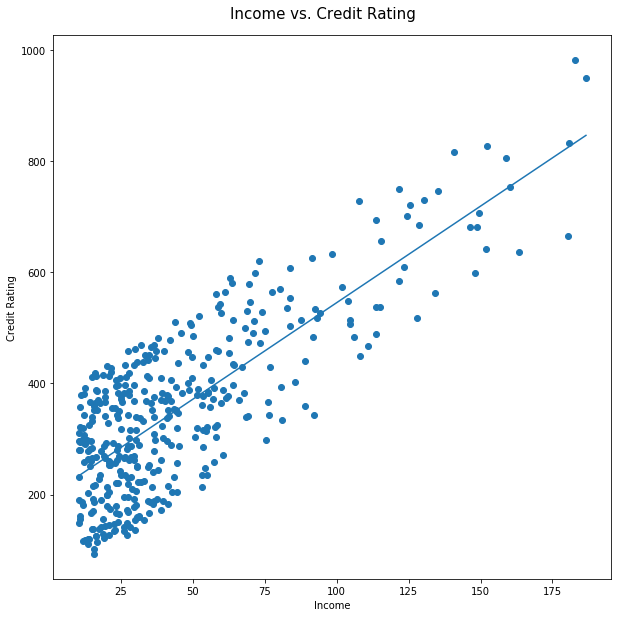

In [10]:
fig = plt.figure(figsize=(10,10))
plt.scatter(credit['Income'], credit['Rating'])
sorted_order = np.argsort(credit['Income'])
plt.plot(credit['Income'][sorted_order], predictions[sorted_order])
plt.xlabel('Income')
plt.ylabel('Credit Rating')
fig.suptitle('Income vs. Credit Rating', fontsize=15, y=0.92)

Text(0.5,0.92,'Residuals')

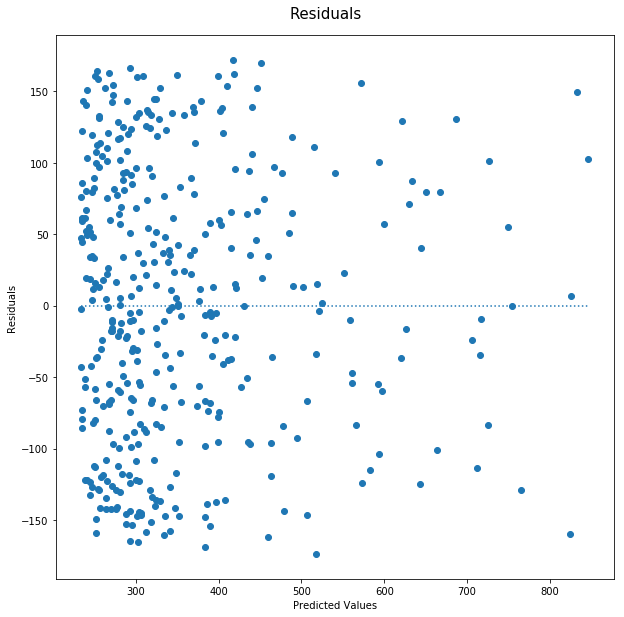

In [11]:
fig = plt.figure(figsize=(10,10))
plt.scatter(predictions, residuals)
plt.plot([predictions.min(), predictions.max()], [0,0], linestyle='dotted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

The datapoints are definitely more grouped along the left side, but transforming the variables will not improve this relationship (not seen here but feel free to take the log of both variables and see what the relationship looks like). Again, this can be a very subjective process - just think of the end goal - how good is this model at predicting the mean of Y (in this case an individual's credit rating) given a value of X (in this case an individual's income).

In [12]:
slope

3.4741878187778665

In [13]:
intercept

197.8411005542827

In [14]:
intercept + (slope * 100)

545.2598824320694

If an individual has an income of $100,000, our model predicts that their credit rating will be 545 on average.

In [15]:
np.var(predictions) / np.var(credit['Rating'])

0.6262785455281014

The R-squared value here is 62.6%.

It's annoying to run this every time though, isn't it?

In [16]:
est = smf.ols('Rating ~ Income', credit).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     667.0
Date:                Wed, 01 May 2019   Prob (F-statistic):           4.36e-87
Time:                        13:27:12   Log-Likelihood:                -2386.9
No. Observations:                 400   AIC:                             4778.
Df Residuals:                     398   BIC:                             4786.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    197.8411      7.709     25.664      0.000     182.686     212.996
Income         3.4742      0.135     25.826      0.000       3.210       3.739
==============================================================================
Omnibus:                      157.557   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.450
Skew:                          -0.009   Prob(JB):                     2.20e-05
Kurtosis:                       1.866   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Statsmodels provides a way to run models without manually running the steps. The syntax is similar to the programming language **R**.

Note that the coefficient for income is the same as the slope we found above, while the coefficient for the intercept is the same as the intercept above. Conveniently, the p-value for each of these values is displayed, similar to what we found a few classes back where we found whether the slope of a given variable was significant.

Note in the upper right, the R-squared shows 62.6%, the same as what we found manually.

In [17]:
est = smf.ols('Rating ~ Income + Limit + Cards + Age + Education + Gender + Student + Married + Ethnicity + Balance', credit).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     8399.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        13:27:12   Log-Likelihood:                -1488.4
No. Observations:                 400   AIC:                             3001.
Df Residuals:                     388   BIC:                             3049.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 32.0084      4.136      7.739      0.000      23.877      40.140
Gender[T.Female]           0.2204      1.020      0.216      0.829      -1.785       2.225
Student[T.Yes]            -2.0068      2.805     -0.715      0.475      -7.522       3.508
Married[T.Yes]             2.3823      1.058      2.251      0.025       0.301       4.463
Ethnicity[T.Asian]        -2.0062      1.449     -1.384      0.167      -4.856       0.843
Ethnicity[T.Caucasian]    -0.3096      1.255     -0.247      0.805      -2.777       2.158
Income                     0.1239      0.047      2.644      0.009       0.032       0.216
Limit                      0.0632      0.001     44.309      0.000       0.060       0.066
Cards                      4.5967      0.391     11.756      0.000       3.828       5.365
Age                        0.0126      0.030      0.415      0.679      -0.047       0.072
Education                 -0.2349      0.164     -1.434      0.152      -0.557       0.087
Balance                    0.0120      0.005      2.315      0.021       0.002       0.022
==============================================================================
Omnibus:                        6.295   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                5.637
Skew:                           0.226   Prob(JB):                       0.0597
Kurtosis:                       2.633   Cond. No.                     4.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With Statsmodels, we can also run a multi-variate regression model, where we predict a person's credit rating using several different factors. There are several things to note here:

1) The R-squared has now increased to 99.6%, meaning that nearly all the variance for a person's credit rating is explained.  
2) Note the coefficient and p-value for income has changed. The coefficient is much less than it was before. Why might this be?  
3) Note that some variables are categorical, such as Gender, Student and Married. For these, the slope means that, for instance, someone's credit rating will decrease by 2 if they are a student or increase by 2.38 if the person is married (or increase by 0.38 if the person is both a student and married)  
4) Note that some variables have p-values that are above 0.05, meaning that we fail to reject the null hypothesis that there is a correlation with this variable and the response variable. For instance, we fail to reject the null hypothesis that there is no correlation between Age and Credit Rating.  
5) We can experiment with removing and adding different variables to see how it changes the R-squared score. You can also notice how the coefficients will change as we change the model.  
6) This is the beginning of machine learning!!! We are using multiple variables to predict someone's credit rating using predictive modeling. This might be something that, for instance, a credit card company may want to know in knowing who they should offer credit cards to based on their historic credit rating.  

Below is the residuals graph for our new model. We can use 'est.predict()' to get our new predicted values and 'est.resid' to get our new residuals.

Text(0.5,0.92,'Residuals')

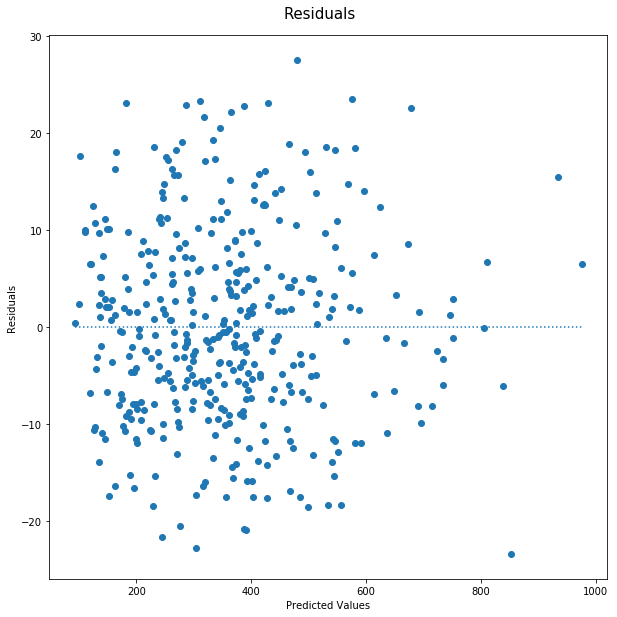

In [18]:
fig = plt.figure(figsize=(10,10))
plt.scatter(est.predict(), est.resid)
plt.plot([est.predict().min(), est.predict().max()], [0,0], linestyle='dotted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)